# (A2.1 Regresión logística y validación cruzada)         
                                                                                                       
                                                                            Fernando Ariel Lozano Castillo


En este proyecto usare la base de datos una base de datos del   ,[INEGI](https://www.inegi.org.mx/app/descarga/ficha.html?tit=1330093&ag=0&f=csv), concretamente la **Encuesta Nacional sobre Acceso y Permanencia en la Educación (ENAPE) (datos de 2021)**, que contiene más de 32mil observaciones y 100 diferentes variables.

A la cual le aplicaré una regresión logística, matriz de confusión y curva ROC.
Y  debido a que lo que buscamos es hacer una clasificación de personas, la salida en esta ocasión es la variable `PB3_1` la cual es la pregunta: **¿(NOMBRE ) está inscrita(o) en el actual año o ciclo escolar (2021-2022) que inició en agosto/septiembre de 2021?** que tiene como posibles respuestas 1=Si , 2=No

Primero lo que haremos es usar la librería de pandas para leer el archivo y lo almacenamos en la variable `df`, después de ello con la función `shape` veré el tamaño de la base de datos. Y con `value_counts` vere en la variable de salida, cuantas veces aparece `1` y `2` para checar que no haya huecos. Y NIVEL_A,(referente a que nivel escolar estuvieron en el año escolar 2020-2021, más adelante se muestra a detalle que posibles respuestas tiene esta columna) 

In [146]:
# Importa la librería pandas
import pandas as pd
df = pd.read_csv("Encuestas.csv")

print("Tamaño de la base : ",df.shape,"\n")

# Obtener los conteos de valores
conteo_respuestas = df.PB3_1.value_counts()

# Mostrar el conteo
print(conteo_respuestas)

# Calcular el total de respuestas
total_respuestas = conteo_respuestas.sum()

# Mostrar el total de respuestas
print("Total de respuestas:" ,total_respuestas)
# Verificar si la suma es menor que el número total de filas en el DataFrame
if total_respuestas < df.shape[0]:
    print("La suma de respuestas ", total_respuestas, " es menor que el total de filas de la base ", df.shape[0])


print(" ")
print(" ")
print(" ")

# Obtener los conteos de valores
conteo_respuestas1 = df.NIVEL_A.value_counts()

# Mostrar el conteo
print(conteo_respuestas1)

# Calcular el total de respuestas
total_respuestas1 = conteo_respuestas1.sum()

# Mostrar el total de respuestas
print("Total de respuestas:" ,total_respuestas1)
# Verificar si la suma es menor que el número total de filas en el DataFrame
if total_respuestas1 < df.shape[0]:
    print("La suma de respuestas ", total_respuestas1, " es menor que el total de filas de la base ", df.shape[0])

Tamaño de la base :  (32343, 101) 

PB3_1
1.0    19655
2.0    10633
Name: count, dtype: int64
Total de respuestas: 30288
La suma de respuestas  30288  es menor que el total de filas de la base  32343
 
 
 
NIVEL_A
3.0     7172
4.0     3694
9.0     3224
6.0     2684
2.0     2199
7.0      758
8.0       94
1.0       91
11.0      80
5.0       44
10.0      17
12.0       7
Name: count, dtype: int64
Total de respuestas: 20064
La suma de respuestas  20064  es menor que el total de filas de la base  32343



## Solución de errores y Eliminación de variables



Para fines de este proyecto de las 101 variables, solo usaré 5 de ellas, por lo que borraré el resto de las variables de `df`


Debido a que al checar que **PB3_1**  y **NIVEL A** no contienen todas las respuestas de los 32343 encuestados, y con un chequeo manual de la base, podemos darnos cuenta qué tiene celdas vacías.

- Primero
Para fines de este proyecto, de las 101 variables, solo usaré 5 variables de interés y la variable de salida, de ellas, por lo que dejaré a `df` solo con esas 6 variables.
**SEXO** : 1 = Hombre , 2 =Mujer

**EDAD** : De 0 a 28 años

**PA3_1** :Es la pregunta ¿(NOMBRE ) estuvo inscrita(o) el pasado año o ciclo escolar (2020- 2021)? . 1=Si , 2=No


**PB3_1 : La variable de salida que se comentó al principio.**


**NIVEL_A** :Nivel  de escolaridad del año escolar anterior - 
### Niveles Educativos (NIVEL A)

| Código | Nivel Educativo                                      |
|--------|-----------------------------------------------------|
| 01     | Educación inicial (guardería)                      |
| 02     | Preescolar                                         |
| 03     | Primaria                                           |
| 04     | Secundaria                                         |
| 05     | Profesional técnico (carrera técnica con secundaria terminada) |
| 06     | Preparatoria o bachillerato general               |
| 07     | Bachillerato tecnológico                          |
| 08     | Técnico Superior Universitario (carrera técnica con bachillerato terminado) |
| 09     | Licenciatura o profesional                        |
| 10     | Especialidad                                       |
| 11     | Maestría                                          |
| 12     | Doctorado                                         |

**ENT** : Son los estados de México del 1 al 32 como se muestra a continuación

### Entidades (Estados de México)

| Código | Entidad                          |
|--------|----------------------------------|
| 1      | Aguascalientes                   |
| 2      | Baja California                  |
| 3      | Baja California Sur              |
| 4      | Campeche                         |
| 5      | Coahuila de Zaragoza             |
| 6      | Colima                           |
| 7      | Chiapas                          |
| 8      | Chihuahua                        |
| 9      | Ciudad de México                 |
| 10     | Durango                          |
| 11     | Guanajuato                       |
| 12     | Guerrero                         |
| 13     | Hidalgo                          |
| 14     | Jalisco                          |
| 15     | Estado de México                 |
| 16     | Michoacán de Ocampo              |
| 17     | Morelos                          |
| 18     | Nayarit                          |
| 19     | Nuevo León                       |
| 20     | Oaxaca                           |
| 21     | Puebla                           |
| 22     | Querétaro                        |
| 23     | Quintana Roo                     |
| 24     | San Luis Potosí                  |
| 25     | Sinaloa                          |
| 26     | Sonora                           |
| 27     | Tabasco                          |
| 28     | Tamaulipas                       |
| 29     | Tlaxcala                         |
| 30     | Veracruz de Ignacio de la Llave  |
| 31     | Yucatán                          |
| 32     | Zacatecas                        |







In [149]:
# Eliminacion de variables
df = df[['SEXO', 'EDAD', 'PA3_1', 'ENT', 'NIVEL_A','PB3_1']]
print(df.shape)

#Esta línea crea un nuevo DataFrame df que contiene solo las columnas especificadas: 'SEXO', 'EDAD', 'PA3_1', 'ENT', 'NIVEL_A' y 'PB3_1'.

#En otras palabras, está eliminando todas las demás columnas del DataFrame original, manteniendo solo las columnas mencionadas.

(32343, 6)


Ahora para **NIVEL A**
Checaré las edades y las respuestas a PA3_1 para decidir que hacer con ellas, también se generara un excel con los resultados de esto.


- `df['NIVEL_A'].isna()`: Esto crea una condición booleana que devuelve True para las filas donde el valor en la columna NIVEL_A es NaN (vacío).
`df[df['NIVEL_A'].isna()]`: Esta operación filtra el DataFrame df y selecciona solo las filas donde la condición anterior es True (es decir, donde NIVEL_A está vacío).
El resultado se guarda en la variable muestras_vacias.

- `[['edad', 'PB3_1']]`: Esto selecciona las columnas **edad y PA3_1** del DataFrame muestras_vacias, es decir, solo estas dos columnas serán incluidas en el DataFrame tabla_resultado.


- `to_excel('muestras_vacias_nivel_a.xlsx', index=False)`: Este método guarda el DataFrame tabla_resultado en un archivo Excel llamado muestras_vacias_nivel_a.xlsx.
El parámetro index=False evita que se incluya la columna de índice en el archivo Excel.

In [152]:
# Filtrar las filas donde 'NIVEL_A' está vacío
muestras_vacias = df[df['NIVEL_A'].isna()]

# Seleccionar las columnas 'edad' y 'PB3_1' para esas filas
tabla_resultado = muestras_vacias[['EDAD', 'PA3_1']]

# Guardar la tabla en un archivo Excel
tabla_resultado.to_excel('muestras_vacias_nivel_a.xlsx', index=False)

print("Archivo Excel guardado con éxito como 'muestras_vacias_nivel_a.xlsx'")

Archivo Excel guardado con éxito como 'muestras_vacias_nivel_a.xlsx'


No se nota pero después de observar la tabla, las vacías son de edades de 0,1,2,2,26,27,etc por lo que se puede decir que no aplica NIVEL_A debido a que no estuvieron en el año escolar anterior, debido a su corta edad o porque posiblemente se graduaron ya hace tiempo.Por lo que tendremos una opción más en **NIVEL A** que sea `0` = No Aplica
## Cambios de Nan a 0
- Después, en solución de errores, 
checaremos toda la base y que muestre cuáles variables tienen **menos valores** que el total de muestras Y para avanzar en este proyecto, si es que hay filas vacías se pondrán como ceros.

#### 1. Calcular los conteos de valores no nulos
`non_null_counts = df.notnull().sum()`<br>
Este comando calcula la cantidad de valores no nulos en cada columna del DataFrame `df`. <br> 
- La función `notnull()` devuelve una matriz booleana donde `True` indica valores no nulos y `False` valores nulos.  
- Luego, el método `.sum()` cuenta cuántos valores `True` (no nulos) hay en cada columna.  

#### 2. Identificar columnas con datos faltantes
`missing_data_columns = non_null_counts[non_null_counts < len(df)].index`<br>
Esta línea filtra las columnas donde el conteo de valores no nulos es menor que el total de filas en el DataFrame (`len(df)`).  
Esto significa que esas columnas contienen valores nulos.  
- El atributo `.index` devuelve los nombres de estas columnas.  

#### 3. Verificar que las columnas existen en el DataFrame
`missing_data_columns = [col for col in missing_data_columns if col in df.columns]`<br>
Esta línea asegura que todas las columnas identificadas con valores nulos aún existen en el DataFrame.  
- Se usa una comprensión de listas para filtrar solo las columnas que realmente están presentes en `df.columns`.  

#### 4. Mostrar las columnas con valores faltantes
`print("Columnas con menos datos que el total de filas:") display(missing_data_columns)`<br>
Se imprimen los nombres de las columnas con valores nulos.  
- `print()` muestra el mensaje en la consola.  
- `display()` se usa para visualizar el contenido de `missing_data_columns`, especialmente en entornos como Jupyter Notebook.  

#### 5. Reemplazar los valores nulos por 0 en las columnas con datos faltantes
`df[missing_data_columns] = df[missing_data_columns].fillna(0)
`<br>
Esta línea reemplaza los valores nulos en las columnas identificadas con `0`.  
- `fillna(0)` sustituye todos los valores `NaN` por `0`.  

#### 6. Verificar que los valores nulos han sido reemplazados
`print("\nVerificación de valores nulos después del reemplazo:")`

`print(df[missing_data_columns].isnull().sum())` <br>
Se verifica que ya no queden valores nulos en las columnas afectadas.  
- `isnull().sum()` cuenta cuántos valores `NaN` hay después del reemplazo.  
- Si la salida es `0` para todas las columnas, significa que el reemplazo fue exitoso.  



In [155]:
# Calcular los conteos de valores no nulos
non_null_counts = df.notnull().sum()

# Verificar qué columnas tienen menos datos que el total de filas en el DataFrame
missing_data_columns = non_null_counts[non_null_counts < len(df)].index

# Verificar que las columnas existan en el DataFrame
missing_data_columns = [col for col in missing_data_columns if col in df.columns]

print("Columnas con menos datos que el total de filas:")
display(missing_data_columns)


# Reemplazar los valores nulos por 0 en esas columnas
df[missing_data_columns] = df[missing_data_columns].fillna(0)

# Verificar que los valores nulos han sido reemplazados
print("\nVerificación de valores nulos después del reemplazo:")
print(df[missing_data_columns].isnull().sum())


Columnas con menos datos que el total de filas:


['PA3_1', 'NIVEL_A', 'PB3_1']


Verificación de valores nulos después del reemplazo:
PA3_1      0
NIVEL_A    0
PB3_1      0
dtype: int64


En lo anterior podemos ver que las  variables `PA3_1`,`NIVEL_A`,`PB3_1` contaban con NaN y se cambiaron a cero, checamos con `value_counts` que la variable de salida `PB3_1` ,ahora tenga solo 0 ,1 y 2.   

In [159]:
print(df.PB3_1.value_counts())

PB3_1
1.0    19655
2.0    10633
0.0     2055
Name: count, dtype: int64


### Cambio en variable Sexo , PA3_1 , PB3_1
Ahora lo que haré es cambiar la variable de sexo a valores de 0=mujer y 1=hombre. PA3_1 a 1=Si , 2 lo cambiare a 0 para que sean los NO y es el mismo caso para PB3_1.
Mediante `value counts` mostrare la cantidad de 1 ,2 y 0 que hay actualmente.
Con `replace ` cambio los 2 a 0



In [162]:
print(df.PA3_1.value_counts())
print(" ")
print(df.PB3_1.value_counts())
print(" ")
print(df.SEXO.value_counts())
print(" ")


print("Cambios de variables")
print(" ")
df.PA3_1 = df.PA3_1.replace({2: 0})
print(df.PA3_1.value_counts())
print(" ")
df.PB3_1 = df.PB3_1.replace({2: 0})
print(df.PB3_1.value_counts())
print(" ")
df.SEXO = df.SEXO.replace({2: 0})
print(df.SEXO.value_counts())

PA3_1
1.0    20064
2.0    10224
0.0     2055
Name: count, dtype: int64
 
PB3_1
1.0    19655
2.0    10633
0.0     2055
Name: count, dtype: int64
 
SEXO
1    16684
2    15659
Name: count, dtype: int64
 
Cambios de variables
 
PA3_1
1.0    20064
0.0    12279
Name: count, dtype: int64
 
PB3_1
1.0    19655
0.0    12688
Name: count, dtype: int64
 
SEXO
1    16684
0    15659
Name: count, dtype: int64


## Separación de datos
Ahora terminado los cambios en variables y la base
dividimos los datos en entrenamiento y prueba 80/20 respectivamente mediante `train_test_split` de la libreria de sklearn.
E imprimimos las proporciones para los datos originales,datos de entreamineto y datos de prueba.


In [172]:

# Importar función
from sklearn.model_selection import train_test_split

# Generar subconjuntos de prueba y entrenamiento para X e Y
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("PB3_1", axis=1), df.PB3_1, train_size=0.8, random_state=42)

# Imprimir conteo en entrenamiento
print("\nEn entrenamiento: ", Y_train.value_counts())

# Imprimir conteo en prueba
print("\nEn prueba: ", Y_test.value_counts())

# Imprimir conteo en datos originales
print("\nEn datos originales: ", df.PB3_1.value_counts())



En entrenamiento:  PB3_1
1.0    15715
0.0    10159
Name: count, dtype: int64

En prueba:  PB3_1
1.0    3940
0.0    2529
Name: count, dtype: int64

En datos originales:  PB3_1
1.0    19655
0.0    12688
Name: count, dtype: int64


Ahora checamos si hay desbalance de clases

`total_entrenamiento = sum(conteo_entrenamiento.values())
`


`total_originales = sum(conteo_originales.values())
`


` total_prueba = sum(conteo_prueba.values())
`



Aquí, sumamos las ocurrencias de 1.0 y 0.0 para cada conjunto de datos. Usamos el método .values() para obtener los valores (número de ocurrencias) del diccionario, y luego usamos la función sum() para obtener el total de elementos en cada conjunto. Esto nos da el número total de observaciones en cada conjunto (original, entrenamiento y prueba).


`porcentaje_1_originales = (conteo_originales[1.0] / total_originales) * 100
`


`porcentaje_1_entrenamiento = (conteo_entrenamiento[1.0] / total_entrenamiento) * 100
`


`porcentaje_1_prueba = (conteo_prueba[1.0] / total_prueba) * 100
`



En estas líneas, calculamos el porcentaje de la clase 1.0 para cada conjunto de datos. Para hacer esto:

Tomamos el número de ocurrencias de 1.0 (por ejemplo, conteo_originales[1.0]) y lo dividimos entre el total de observaciones de ese conjunto (por ejemplo, total_originales).
Multiplicamos por 100 para obtener el valor en porcentaje.

In [179]:
# Datos 
conteo_originales = {1.0: 19655, 0.0: 12688}
conteo_entrenamiento = {1.0: 15715, 0.0: 10159}
conteo_prueba = {1.0: 3940, 0.0: 2529}

# Calcular el total de los datos originales, de entrenamiento y de prueba
total_originales = sum(conteo_originales.values())
total_entrenamiento = sum(conteo_entrenamiento.values())
total_prueba = sum(conteo_prueba.values())

# Calcular el porcentaje de 1.0 en los datos originales, entrenamiento y prueba
porcentaje_1_originales = (conteo_originales[1.0] / total_originales) * 100
porcentaje_1_entrenamiento = (conteo_entrenamiento[1.0] / total_entrenamiento) * 100
porcentaje_1_prueba = (conteo_prueba[1.0] / total_prueba) * 100

# Calcular el porcentaje de 0.0 en los datos originales, entrenamiento y prueba
porcentaje_0_originales = (conteo_originales[0.0] / total_originales) * 100
porcentaje_0_entrenamiento = (conteo_entrenamiento[0.0] / total_entrenamiento) * 100
porcentaje_0_prueba = (conteo_prueba[0.0] / total_prueba) * 100

# Imprimir los resultados
print(f"Porcentaje de 1.0 en los datos originales: {porcentaje_1_originales:.2f}%")
print(f"Porcentaje de 0.0 en los datos originales: {porcentaje_0_originales:.2f}%")

print(f"Porcentaje de 1.0 en los datos de entrenamiento: {porcentaje_1_entrenamiento:.2f}%")
print(f"Porcentaje de 0.0 en los datos de entrenamiento: {porcentaje_0_entrenamiento:.2f}%")

print(f"Porcentaje de 1.0 en los datos de prueba: {porcentaje_1_prueba:.2f}%")
print(f"Porcentaje de 0.0 en los datos de prueba: {porcentaje_0_prueba:.2f}%")


Porcentaje de 1.0 en los datos originales: 60.77%
Porcentaje de 0.0 en los datos originales: 39.23%
Porcentaje de 1.0 en los datos de entrenamiento: 60.74%
Porcentaje de 0.0 en los datos de entrenamiento: 39.26%
Porcentaje de 1.0 en los datos de prueba: 60.91%
Porcentaje de 0.0 en los datos de prueba: 39.09%


Como se puede apreciar, no hay gran desbalance de clases en datos originales,en prueba y entrenamiento,solo cambian por decimas. Ahora usaré la función `LogisticRegression` de la librería sklearn.linear_model; defino `penalty="none"`, pues de momento no queremos realizar un proceso de penalización que ayude a eliminar variables.

Y para minimizar el efecto de  desbalance de clases, definiré `class_weight="balanced"`, de forma que se agregue un peso a cada clase cuando se estime la función de verisimilitud. A una clase con muy pocas muestras se le dará un peso grande, y a una clase con muchas muestras se le dará un peso pequeño. De esta forma se trata de que la precisión en la predicción de ambas clases terminen teniendo la misma importancia para el modelo.

In [185]:
# Importar la función
from sklearn.linear_model import LogisticRegression

# Generar y entrenar el modelo sin cambiar la forma de la variable
model = LogisticRegression(penalty=None, class_weight="balanced").fit(X_train, Y_train)


cross_val_score:

Parámetros:
model: El modelo que deseas evaluar (en este caso, el modelo de regresión logística).


X_train: Las características de entrenamiento (sin la columna de salida PB3_1).


Y_train: Las etiquetas de salida (en este caso, la variable PB3_1).


cv=5: Esto indica que deseas realizar la validación cruzada con 5 pliegues. Esto significa que los datos de entrenamiento se dividen en 5 subconjuntos, y el modelo se entrena y evalúa 5 veces, utilizando cada subconjunto como conjunto de prueba en cada iteración y los otros 4 subconjuntos como entrenamiento.


scoring='accuracy': Esto le dice a la función que debe calcular la exactitud en cada pliegue.

In [187]:
# Importar la función para validación cruzada
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')

# Imprimir las puntuaciones obtenidas para cada pliegue
print(f"Validación cruzada (5 pliegues) - Exactitud por pliegue: {cv_scores}")

# Calcular la media de la exactitud de todos los pliegues
mean_cv_score = cv_scores.mean()
print(f"\nExactitud media en la validación cruzada: {mean_cv_score:.4f}")


Validación cruzada (5 pliegues) - Exactitud por pliegue: [0.90782609 0.90492754 0.90782609 0.91188406 0.89524546]

Exactitud media en la validación cruzada: 0.9055


La validación cruzada con 5 pliegues muestra que el modelo tiene una alta precisión en general, con una exactitud promedio de 0.9055. Las puntuaciones de cada pliegue son bastante consistentes, lo que sugiere que el modelo tiene un buen rendimiento y no está sobreajustado a los datos de entrenamiento.

Confusión con umbral 0.5:
[[2173  356]
 [ 280 3660]]
Exactitud: 0.9017, Sensibilidad: 0.9289, Especificidad: 0.8592

Confusión con umbral 0.6:
[[2194  335]
 [ 323 3617]]
Exactitud: 0.8983, Sensibilidad: 0.9180, Especificidad: 0.8675

Confusión con umbral 0.4:
[[2169  360]
 [ 272 3668]]
Exactitud: 0.9023, Sensibilidad: 0.9310, Especificidad: 0.8577



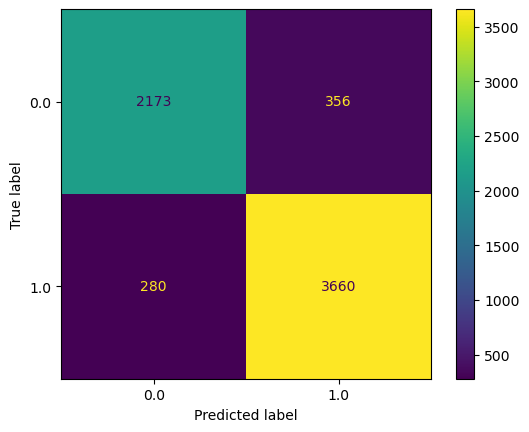

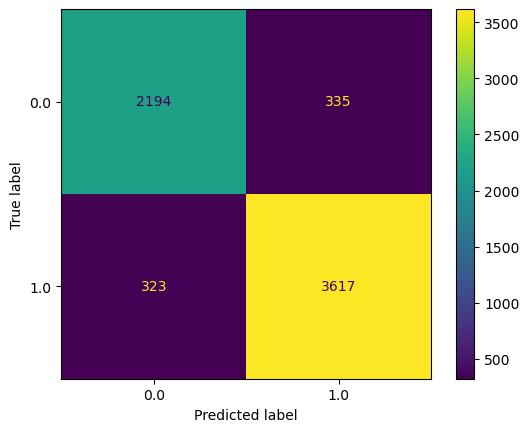

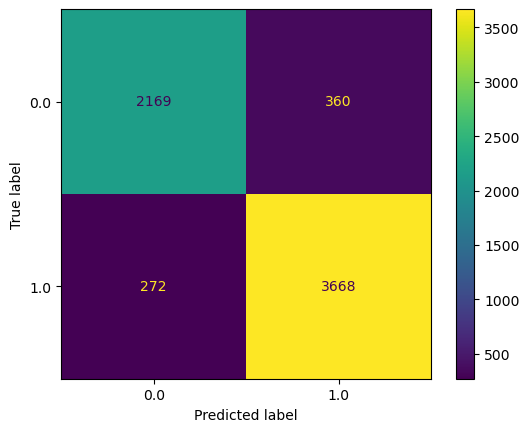

In [217]:
# Importar funciones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import numpy as np

# Generar las probabilidades para el conjunto de prueba
pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase 1

# Definir los umbrales
umbral1 = 0.5
umbral2 = 0.6
umbral3 = 0.4

# Hacer predicciones con los diferentes umbrales
pred1 = (pred_prob >= umbral1).astype(int)
pred2 = (pred_prob >= umbral2).astype(int)
pred3 = (pred_prob >= umbral3).astype(int)

# Función para calcular métricas de la matriz de confusión
def calcular_metricas(cm):
    TP = cm[1, 1]  # Verdaderos Positivos
    TN = cm[0, 0]  # Verdaderos Negativos
    FP = cm[0, 1]  # Falsos Positivos
    FN = cm[1, 0]  # Falsos Negativos

    # Exactitud
    exactitud = (TP + TN) / (TP + TN + FP + FN)
    
    # Sensibilidad (Recall)
    sensibilidad = TP / (TP + FN)
    
    # Especificidad
    especificidad = TN / (TN + FP)

    return exactitud, sensibilidad, especificidad

# Para el umbral 0.5
cm1 = confusion_matrix(Y_test, pred1)
cmd(cm1, display_labels=model.classes_).plot(xticks_rotation="horizontal")
exactitud1, sensibilidad1, especificidad1 = calcular_metricas(cm1)
print(f"Confusión con umbral 0.5:\n{cm1}")
print(f"Exactitud: {exactitud1:.4f}, Sensibilidad: {sensibilidad1:.4f}, Especificidad: {especificidad1:.4f}\n")

# Para el umbral 0.6
cm2 = confusion_matrix(Y_test, pred2)
cmd(cm2, display_labels=model.classes_).plot(xticks_rotation="horizontal")
exactitud2, sensibilidad2, especificidad2 = calcular_metricas(cm2)
print(f"Confusión con umbral 0.6:\n{cm2}")
print(f"Exactitud: {exactitud2:.4f}, Sensibilidad: {sensibilidad2:.4f}, Especificidad: {especificidad2:.4f}\n")

# Para el umbral 0.4
cm3 = confusion_matrix(Y_test, pred3)
cmd(cm3, display_labels=model.classes_).plot(xticks_rotation="horizontal")
exactitud3, sensibilidad3, especificidad3 = calcular_metricas(cm3)
print(f"Confusión con umbral 0.4:\n{cm3}")
print(f"Exactitud: {exactitud3:.4f}, Sensibilidad: {sensibilidad3:.4f}, Especificidad: {especificidad3:.4f}\n")


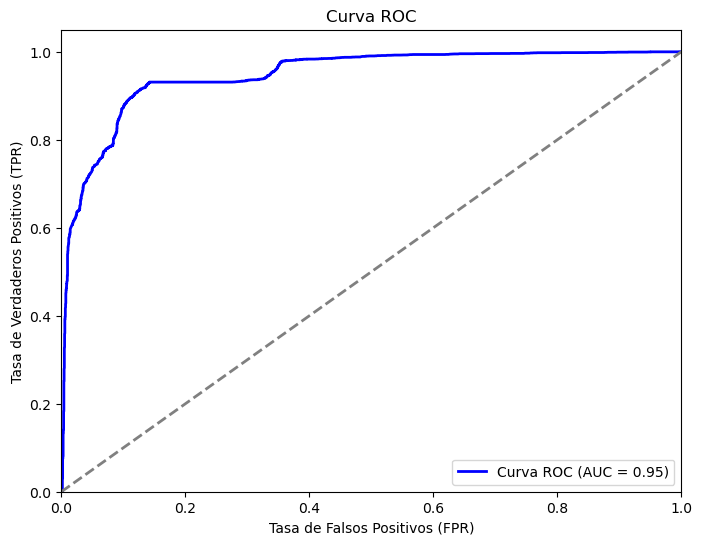

El valor de la AUC es: 0.9466


In [213]:
# Importar las funciones necesarias
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas para la clase 1
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calcular el valor de AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Reportar el valor de AUC
print(f"El valor de la AUC es: {roc_auc:.4f}")


El modelo tiene un 94.66% de probabilidad de clasificar correctamente un caso positivo por encima de uno negativo.

In [224]:
# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]
nombres_variables = X_train.columns

# Crear un DataFrame para mostrar los coeficientes y las variables
import pandas as pd
coef_df = pd.DataFrame({
    'Variable': nombres_variables,
    'Coeficiente': coeficientes
})

print(coef_df)


  Variable  Coeficiente
0     SEXO    -0.081235
1     EDAD    -0.095384
2    PA3_1     5.754784
3      ENT     0.002938
4  NIVEL_A    -0.181893



A medida que el valor de SEXO aumenta, la probabilidad de que la clase sea 1 disminuye en 8.12%. 


A medida que el valor de EDAD aumenta, la probabilidad de que la clase sea 1 disminuye en 9.54%.


  El coeficiente positivo y grande indica que PA3_1 tiene una relación muy fuerte y positiva con la probabilidad de que la clase sea 1 

  
Con cada incremento de 1 unidad en PA3_1, la probabilidad de que el evento de interés ocurra aumenta en 575.48%.


 Por cada incremento de 1 unidad en ENT, la probabilidad de que la clase sea 1 aumenta en solo 0.29%. 

 
Con cada incremento de 1 unidad en NIVEL_A, la probabilidad de que el evento de interés ocurra disminuye en 18.19%.